<a href="https://colab.research.google.com/github/hardworkgithub/Spam-Classifier/blob/main/SMS_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv("/content/sample_data/spam.csv",encoding="ISO-8859-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1523,ham,Yup ok thanx...,NaN,NaN,NaN
5462,spam,Txt: CALL to No: 86888 & claim your reward of ...,NaN,NaN,NaN
2166,ham,"Thank you. And by the way, I just lost.",NaN,NaN,NaN
946,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
4240,ham,Detroit. The home of snow. Enjoy it.,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
## Data cleaning
## EDA
##text preprocessing
## model building



**1**.**Data Cleaning**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
## drop last 3 column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
3277,ham,What happened in interview?
841,ham,Pls send me a comprehensive mail about who i'm...
1719,ham,Then u better go sleep.. Dun disturb u liao.. ...
824,ham,Have a good evening! Ttyl
750,spam,"Do you realize that in about 40 years, we'll h..."


In [ ]:
## renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4501,ham,Wot is u up 2 then bitch?
1224,spam,You are a winner U have been specially selecte...
280,ham,You got called a tool?
876,ham,Are you in castor? You need to see something
2760,ham,I dont thnk its a wrong calling between us


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [ ]:
 df['target']=encoder.fit_transform(df['target'])

In [ ]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
## remove duplicate values
df= df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# **2**.**EDA** exploratory data analysis

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

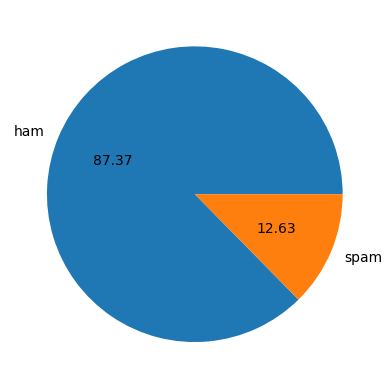

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [ ]:
## data is imbalanced

In [ ]:
import nltk

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)  

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## no of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() ## for ham messages

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
## for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
## plot histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

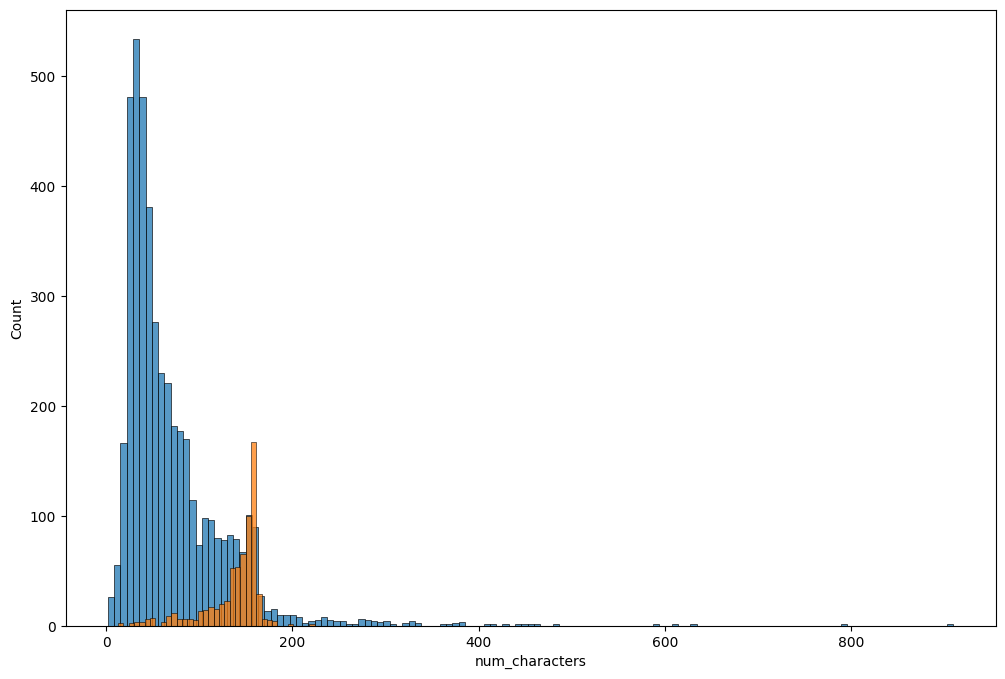

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

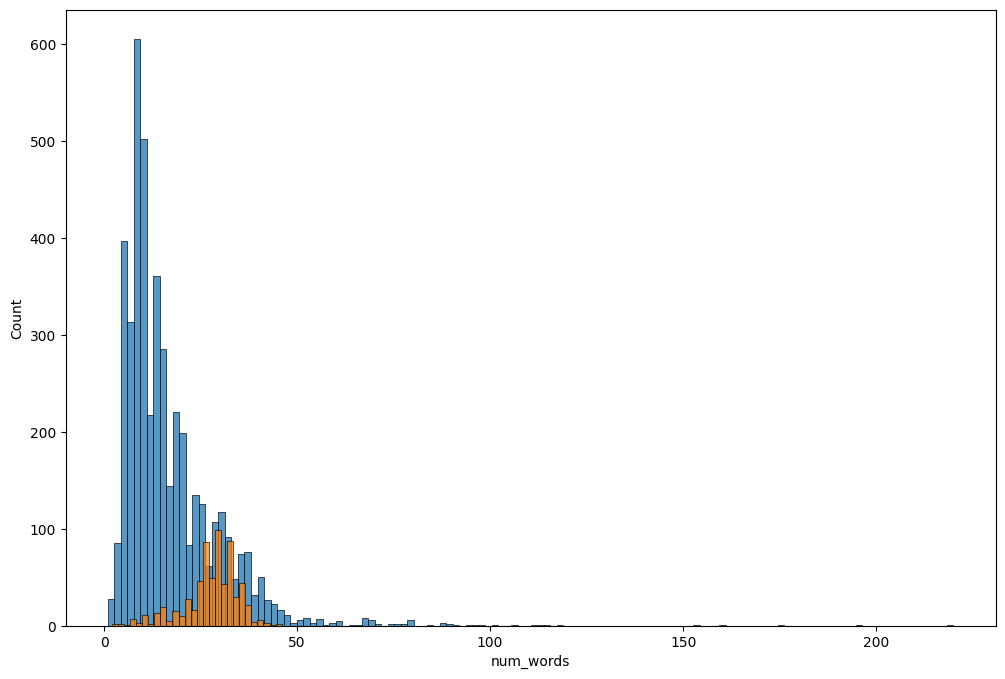

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

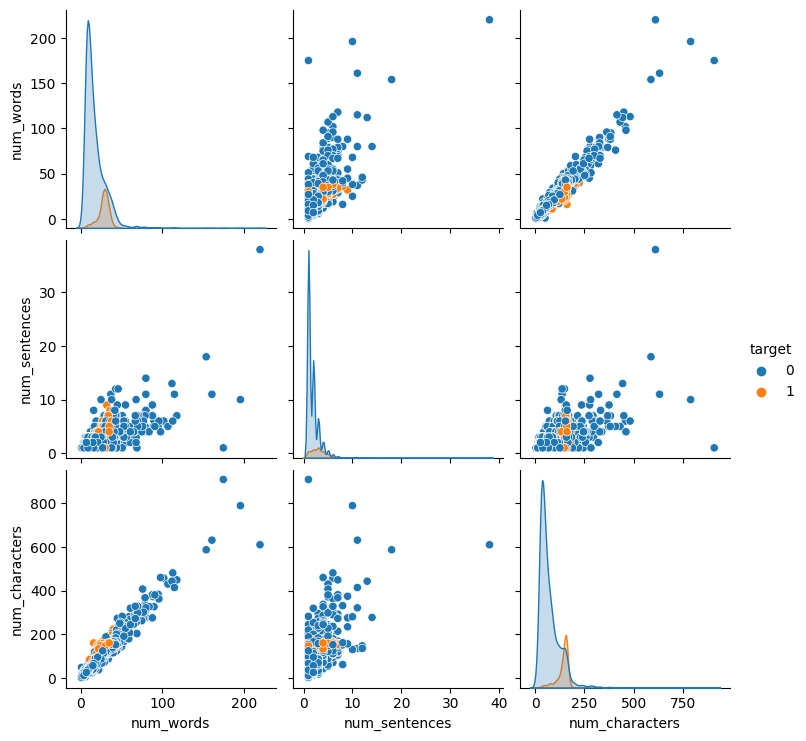

In [ ]:
sns.pairplot(df,hue="target")

<ipython-input-47-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

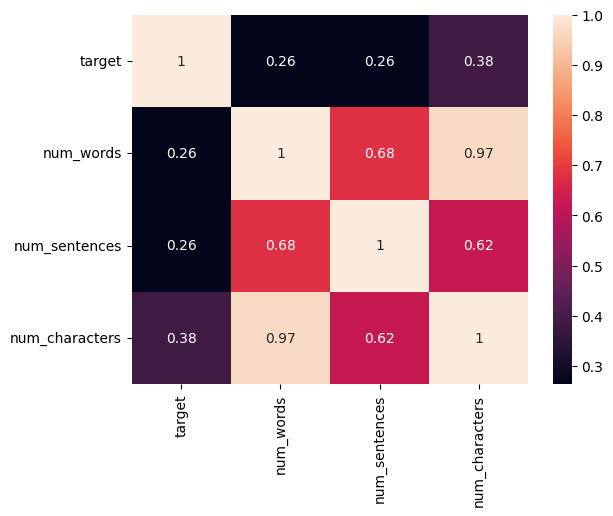

In [ ]:
 sns.heatmap(df.corr(),annot=True)

**3** **Data** **preprocessing**



1.   Lower Case
2.   TOkenization
3.   removing special characters
4.   removing stop words and punctuation
5.   stemming














In [ ]:
def transform_text(text):
  text=text.lower()
  text= nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text :
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i) 
  text=y[:]
  y.clear() 

  for i in text:
    y.append(ps.stem(i))    

  return " ".join(y)  
        
  return y   


  return text

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
  
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text("I loved the YT lecture on Machineb learning?")

'love yt lectur machineb learn'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [ ]:
df['transform_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [ ]:
## generating world cloud 
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

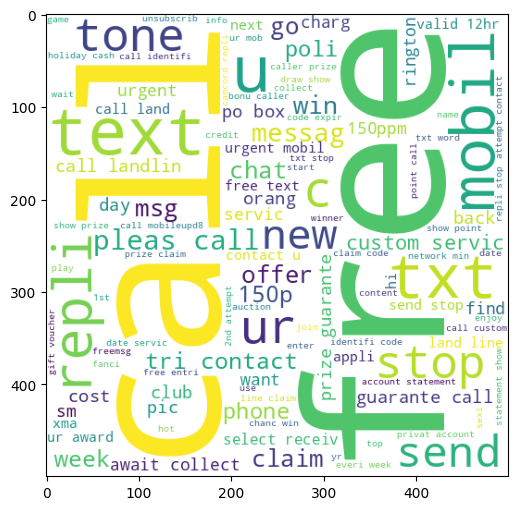

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

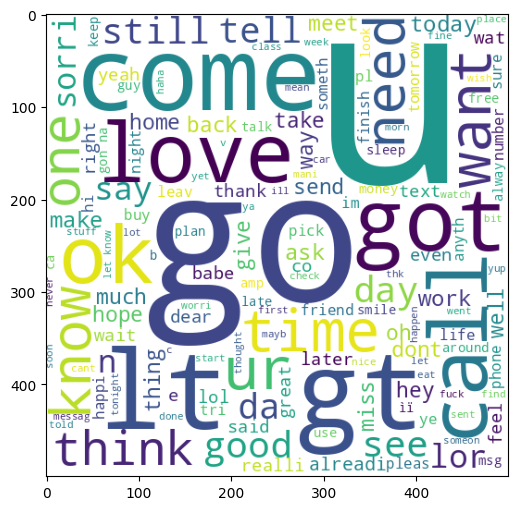

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
  

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


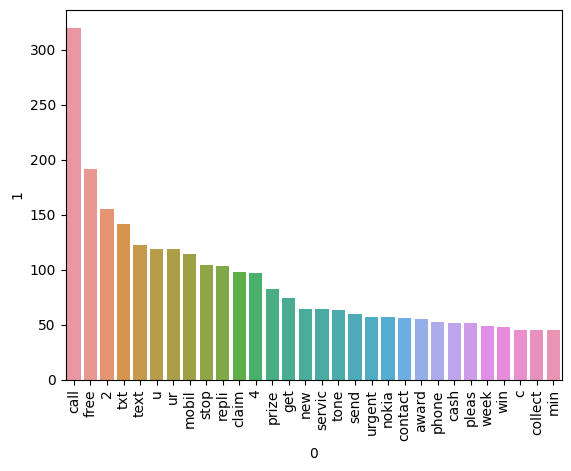

In [ ]:
z=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(data=z,x=0,y=1)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


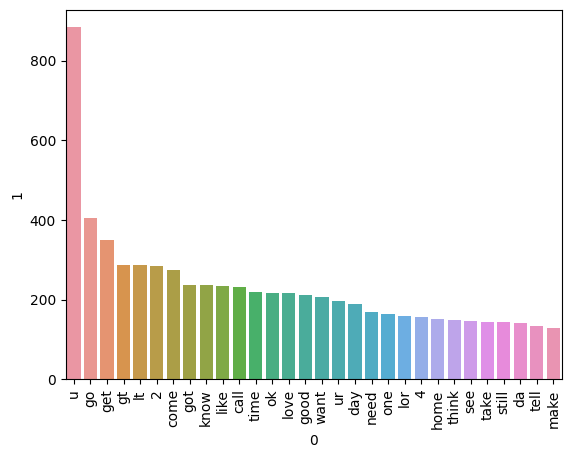

In [ ]:
a=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(data=a,x=0,y=1)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
## text vectorization
# using bag of words
df.head()

,target,text,num_words,num_sentences,num_characters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


Naivey baye's

**4** **model** **building**

In [ ]:
from sklearn.feature_extraction.text  import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
X.shape

(5169, 6708)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB ,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:

gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
## since precision score matters more 
## tfidf->mnb